<a href="https://colab.research.google.com/github/coder-manisha/diabetes-prediction/blob/main/deeplearning_imagedetection_project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [ ]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

In [ ]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

In [ ]:
def label_image(img):
  word_label = img.split('_')[0]
  if word_label == 'NIKE': return [1,0]
  elif word_label == 'ADIDAS': return [0,1]

In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL
  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
  #Create composite image by blending images using a transparency mask. ..
  # ANTIALIAS (a high-quality downsampling filter).

  train_data.append([np.array(img), np.array(label)])

shuffle(train_data)

100%|██████████| 100/100 [00:00<00:00, 274.06it/s]


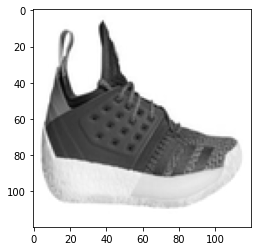

In [ ]:
plt.imshow(train_data[35][0], cmap='gist_gray')
plt.show()

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=10)

Epoch 1/10
4/4 [==============================] - 15s 3s/step - loss: 0.9835 - accuracy: 0.4800
Epoch 2/10
4/4 [==============================] - 14s 3s/step - loss: 0.7564 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 14s 3s/step - loss: 0.7329 - accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 15s 4s/step - loss: 0.6799 - accuracy: 0.5300
Epoch 5/10
4/4 [==============================] - 14s 3s/step - loss: 0.6505 - accuracy: 0.7300
Epoch 6/10
4/4 [==============================] - 14s 3s/step - loss: 0.7568 - accuracy: 0.5100
Epoch 7/10
4/4 [==============================] - 14s 3s/step - loss: 0.7829 - accuracy: 0.4700
Epoch 8/10
4/4 [==============================] - 14s 3s/step - loss: 0.6361 - accuracy: 0.5700
Epoch 9/10
4/4 [==============================] - 14s 3s/step - loss: 0.5834 - accuracy: 0.7700
Epoch 10/10
4/4 [==============================] - 14s 3s/step - loss: 0.4882 - accuracy: 0.7500


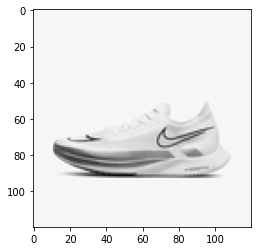

In [ ]:
# PIL
img = Image.open('/content/niketest.webp')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [ ]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

array([[0.6316    , 0.36840007]], dtype=float32)